<a href="https://colab.research.google.com/github/eliashossain001/Quantum-ML/blob/main/QML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup and Installation

In [1]:
!pip install pennylane
!pip install pennylane[torch]    # if you want PyTorch
!pip install pennylane[tensorflow]   # if you want TensorFlow

ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 98.9 MB/s eta 0:00:00


### Quantum Basics in Pennylane

In [2]:
import pennylane as qml
from pennylane import numpy as np

# Device: 1 magic coin (qubit)
dev = qml.device("default.qubit", wires=1, shots=10)

# 1. Ordinary coin (always 0)
@qml.qnode(dev)
def ordinary_coin():
    # do nothing, leave in |0>
    return qml.sample(qml.PauliZ(0))   # measure
print("Ordinary coin results:", ordinary_coin())

# 2. Flip with X gate (always 1)
@qml.qnode(dev)
def flipped_coin():
    qml.PauliX(wires=0)  # flip 0 -> 1
    return qml.sample(qml.PauliZ(0))
print("Flipped coin results:", flipped_coin())

# 3. Magic coin (superposition with Hadamard)
@qml.qnode(dev)
def magic_coin():
    qml.Hadamard(wires=0)  # put coin in 0+1 state
    return qml.sample(qml.PauliZ(0))
print("Magic coin results (random mix):", magic_coin())


Ordinary coin results: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Flipped coin results: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Magic coin results (random mix): [ 1.  1.  1.  1. -1. -1. -1.  1. -1.  1.]


Output tracing:

- +1 = qubit is in |0⟩ (heads).

- -1 = qubit is in |1⟩ (tails).

- Ordinary coin = always +1.

- Flipped coin = always -1.

- Magic coin = random mix of +1 and -1 (superposition).

### Variational Circuits (Trainable Quantum Circuits)

In [3]:
# 1. Parametric Gate
dev = qml.device("default.qubit", wires=1, shots=100)

@qml.qnode(dev)
def rotation_circuit(theta):
    qml.RX(theta, wires=0)       # rotate by theta
    return qml.sample(qml.PauliZ(0))

# Try different theta values
print("theta=0:", rotation_circuit(0.0))         # all +1 (state |0>)
print("theta=π:", rotation_circuit(np.pi))       # all -1 (state |1>)
print("theta=π/2:", rotation_circuit(np.pi/2))   # mix of +1 and -1


theta=0: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
theta=π: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
theta=π/2: [ 1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1.
 -1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1.
 -1. -1.  1. -1.  1.  1. -1. -1. -1. -1

In [4]:
# 2. Expectation Value (average outcome)

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def expectation(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))   # average value

print("theta=0:", expectation(0.0))        # ≈ +1
print("theta=π:", expectation(np.pi))      # ≈ -1
print("theta=π/2:", expectation(np.pi/2))  # ≈ 0


theta=0: 1.0
theta=π: -1.0
theta=π/2: 2.220446049250313e-16


Parametric gates let us tune quantum circuits.

By adjusting θ, we can control probabilities.

This is the basis of variational quantum algorithms (like VQE, QAOA, quantum neural networks).

### Quantum + Classical ML (Hybrid Models)

In [ ]:
"""
1. Quantum Circuit as a Layer

We can treat a quantum circuit (with parameters θ) like a layer in a neural network.

Input → encoded into qubits

Circuit applies trainable rotations

Output → measured expectation value
"""

In [8]:
import pennylane as qml
from pennylane import numpy as np
import torch
from torch import nn, optim

# Quantum device
n_qubits = 1
dev = qml.device("default.qubit", wires=n_qubits)

# Quantum circuit
@qml.qnode(dev, interface="torch", diff_method="backprop")
def quantum_circuit(x, weights):
    qml.RX(x, wires=0)
    qml.RY(weights[0], wires=0)
    return qml.expval(qml.PauliZ(0))

# Quantum layer
class QuantumLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.tensor([0.1], dtype=torch.float32))

    def forward(self, x):
        # Run quantum circuit and cast output to float32
        results = [quantum_circuit(v, self.weights) for v in x]
        results = torch.stack(results)
        return results.float()   # <---- FORCE CAST HERE

# Hybrid model
model = nn.Sequential(
    QuantumLayer(),
    nn.Linear(1, 1),   # classical layer
    nn.Sigmoid()
)

# Data (force float32)
X = torch.tensor([0.0, np.pi], dtype=torch.float32)
y = torch.tensor([[0.0], [1.0]], dtype=torch.float32)

# Loss + optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(20):
    optimizer.zero_grad()
    outputs = model(X.unsqueeze(1))   # (2,1)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.5290
Epoch 2, Loss: 0.5213
Epoch 3, Loss: 0.5135
Epoch 4, Loss: 0.5057
Epoch 5, Loss: 0.4978
Epoch 6, Loss: 0.4899
Epoch 7, Loss: 0.4820
Epoch 8, Loss: 0.4741
Epoch 9, Loss: 0.4662
Epoch 10, Loss: 0.4582
Epoch 11, Loss: 0.4503
Epoch 12, Loss: 0.4424
Epoch 13, Loss: 0.4345
Epoch 14, Loss: 0.4266
Epoch 15, Loss: 0.4187
Epoch 16, Loss: 0.4109
Epoch 17, Loss: 0.4031
Epoch 18, Loss: 0.3954
Epoch 19, Loss: 0.3877
Epoch 20, Loss: 0.3800


In [ ]:
"""
The quantum circuit (with RX + RY gates) learns how to rotate the qubit depending on input.

The classical linear layer maps the quantum measurement to a probability.

The optimizer updates the parameter so the output for input=0 moves toward 0, and for input=π moves toward 1.
"""

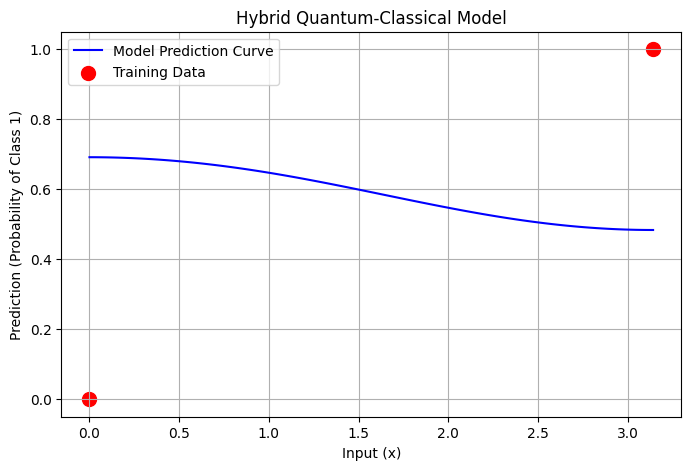

In [10]:
import matplotlib.pyplot as plt

# Generate test inputs between 0 and π
test_inputs = torch.linspace(0, np.pi, 100).unsqueeze(1)  # shape (100,1)
with torch.no_grad():
    predictions = model(test_inputs).numpy()

# Convert training data for plotting
X_np = X.numpy()
y_np = y.numpy()

# Plot
plt.figure(figsize=(8,5))
plt.plot(test_inputs.numpy(), predictions, label="Model Prediction Curve", color="blue")
plt.scatter(X_np, y_np, color="red", s=100, marker="o", label="Training Data")
plt.title("Hybrid Quantum-Classical Model")
plt.xlabel("Input (x)")
plt.ylabel("Prediction (Probability of Class 1)")
plt.legend()
plt.grid(True)
plt.show()
